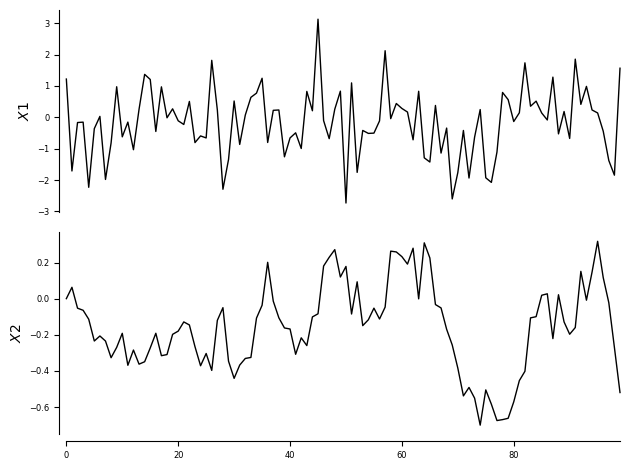

Text(0, 0.5, '$X 2$')

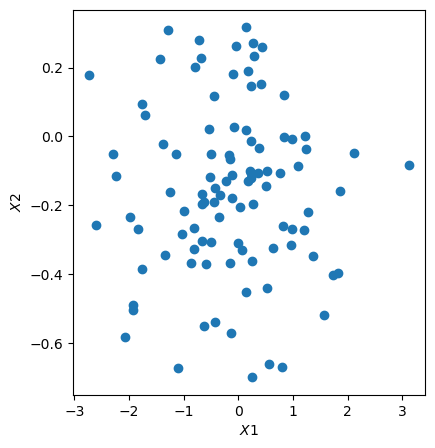

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd


TN = np.random.normal(size=100)

# Parameters for the model
tau = 10  # Characteristic timescale in years
TS_initial = 0  # Initial condition for TS


# Calculate TS without noise, reversing the calculation direction
TS1 = np.zeros(len(TN))
TS2 = np.zeros(len(TN))
TS1[0] = TS_initial
TS2[0] = TS_initial

for i in range(1, len(TN)):
    TS1[i] = TS1[i-1] + (1/tau) * (-TS1[i-1] + TN[i-1])+np.random.normal(0, 0.1)
    TS2[i] = TS2[i-1] + (1/tau) * (-TS2[i-1] + TN[i-1])+np.random.normal(0, 0.1)

# data = np.array([TN, TS1, TS2]).T
data = np.array([TN, TS1]).T


var_names = [r'$X 1$', r'$X 2$', r'$TS2$']

dataframe = pp.DataFrame(data, var_names=var_names)
tp.plot_timeseries(dataframe); plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel(var_names[0])
plt.ylabel(var_names[1])



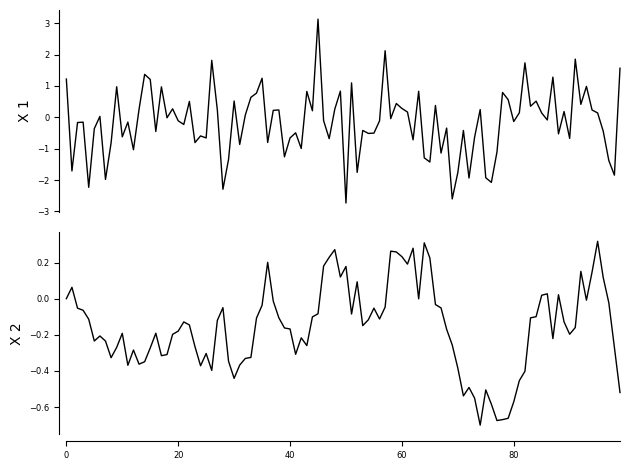

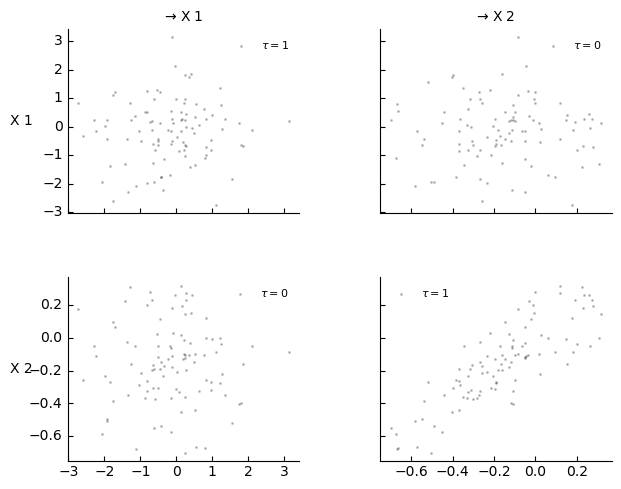

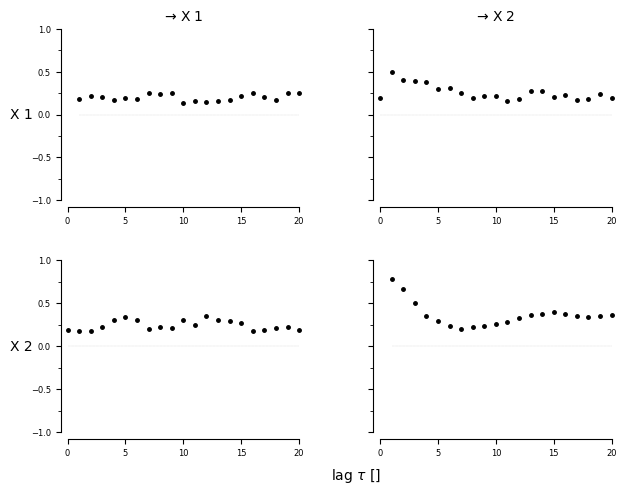

In [6]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI


var_names = [r'X 1', r'X 2']
dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)


tp.plot_timeseries(dataframe); plt.show()

# parcorr = ParCorr(significance='analytic')
# pcmci = PCMCI(
#     dataframe=dataframe, 
#     cond_ind_test=parcorr,
#     verbosity=1)

gpdc_test = gpdc.GPDC(significance='analytic', gp_params=None)
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=gpdc_test,
    verbosity=0)


matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X 1 has 1 link(s):
    [pc_alpha = 0.3]
        (X 2 -2): max_pval = 0.24800, |min_val| =  0.179

    Variable X 2 has 2 link(s):
    [pc_alpha = 0.05]
        (X 2 -1): max_pval = 0.00000, |min_val| =  0.573
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.420

##
## Step 2: MCI algorithm
##

Parameters:

independence test = gp_dc
tau_min = 1
tau_max = 2
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00800 | val =  0.290

    Variable X 2 has 2 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.652
        (X 2 -1): pval = 0.00000 | val =  0.551


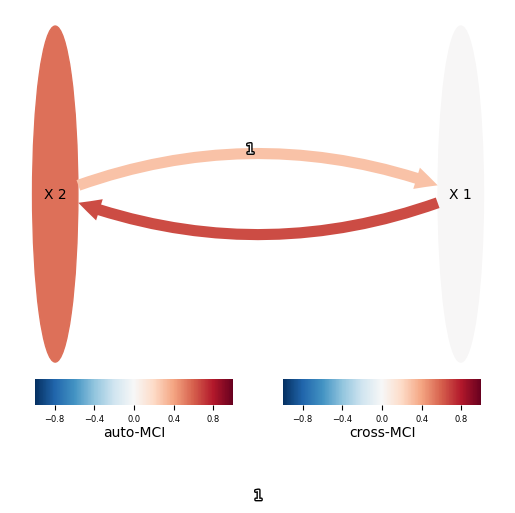

In [10]:

pcmci.verbosity = 1
tau_min=1
tau_max=2
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X 1 has 1 link(s):
    [pc_alpha = 0.3]
        (X 2 -2): max_pval = 0.24800, |min_val| =  0.179

    Variable X 2 has 2 link(s):
    [pc_alpha = 0.05]
        (X 2 -1): max_pval = 0.00000, |min_val| =  0.573
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.420

##
## Step 2: MCI algorithm
##

Parameters:

independence test = gp_dc
tau_min = 1
tau_max = 2
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00800 | val =  0.290

    Variable X 2 has 2 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.652
        (X 2 -1): pval = 0.00000 | val =  0.551
    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00800 | val =  0.290


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_


## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00000 | val =  0.332

    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.636
        (X 2 -1): pval = 0.00000 | val =  0.537
        (X 1 -2): pval = 0.00000 | val =  0.373
    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00000 | val =  0.332
    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.636
        (X 2 -1): pval = 0.00000 | val =  0.537
        (X 1 -2): pval = 0.00000 | val =  0.373
''
'## Significant links at alpha = 0.05:'
'    Variable X 1 has 1 link(s):'
target var: X 1
'        (X 2 -1): pval = 0.00000 | val =  0.332'
Cause match found: <re.Match object; span=(8, 16), match='(X 2 -1)'>
Val match found: <re.Match object; span=(33, 47), match='| val =  0.332'>
['X', '2', '-1']
Cause name: X 2
Cause index: 1
'    Variable X 2 has 3 link(s):'
target var: X 2
'        (X 1 -1): pval = 0.00000 | val =  0.636'
Cause match f

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_v


## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.01000 | val =  0.309

    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.629
        (X 2 -1): pval = 0.00000 | val =  0.530
        (X 1 -2): pval = 0.00600 | val =  0.326
    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.01000 | val =  0.309
    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.629
        (X 2 -1): pval = 0.00000 | val =  0.530
        (X 1 -2): pval = 0.00600 | val =  0.326
''
'## Significant links at alpha = 0.05:'
'    Variable X 1 has 1 link(s):'
target var: X 1
'        (X 2 -1): pval = 0.01000 | val =  0.309'
Cause match found: <re.Match object; span=(8, 16), match='(X 2 -1)'>
Val match found: <re.Match object; span=(33, 47), match='| val =  0.309'>
['X', '2', '-1']
Cause name: X 2
Cause index: 1
'    Variable X 2 has 3 link(s):'
target var: X 2
'        (X 1 -1): pval = 0.00000 | val =  0.629'
Cause match f

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



## Resulting lagged parent (super)sets:

    Variable X 1 has 2 link(s):
    [pc_alpha = 0.05]
        (X 2 -4): max_pval = 0.03800, |min_val| =  0.275
        (X 1 -8): max_pval = 0.04800, |min_val| =  0.257

    Variable X 2 has 2 link(s):
    [pc_alpha = 0.05]
        (X 2 -1): max_pval = 0.00000, |min_val| =  0.576
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.430

##
## Step 2: MCI algorithm
##

Parameters:

independence test = gp_dc
tau_min = 1
tau_max = 8
max_conds_py = None
max_conds_px = None


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz


## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00200 | val =  0.375

    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.632
        (X 2 -1): pval = 0.00000 | val =  0.532
        (X 1 -2): pval = 0.00200 | val =  0.366
    Variable X 1 has 2 link(s):
        (X 2 -1): pval = 0.00200 | val =  0.375
        (X 1 -8): pval = 0.04800 | val =  0.256
    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.632
        (X 2 -1): pval = 0.00000 | val =  0.532
        (X 1 -2): pval = 0.00200 | val =  0.366
''
'## Significant links at alpha = 0.05:'
'    Variable X 1 has 2 link(s):'
target var: X 1
'        (X 2 -1): pval = 0.00200 | val =  0.375'
Cause match found: <re.Match object; span=(8, 16), match='(X 2 -1)'>
Val match found: <re.Match object; span=(33, 47), match='| val =  0.375'>
['X', '2', '-1']
Cause name: X 2
Cause index: 1
'        (X 1 -8): pval = 0.04800 | val =  0.256'
Cause match fou

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_ve


## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00200 | val =  0.350

    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.634
        (X 2 -1): pval = 0.00000 | val =  0.510
        (X 1 -2): pval = 0.00000 | val =  0.370
    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00200 | val =  0.350
    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.634
        (X 2 -1): pval = 0.00000 | val =  0.510
        (X 1 -2): pval = 0.00000 | val =  0.370
''
'## Significant links at alpha = 0.05:'
'    Variable X 1 has 1 link(s):'
target var: X 1
'        (X 2 -1): pval = 0.00200 | val =  0.350'
Cause match found: <re.Match object; span=(8, 16), match='(X 2 -1)'>
Val match found: <re.Match object; span=(33, 47), match='| val =  0.350'>
['X', '2', '-1']
Cause name: X 2
Cause index: 1
'    Variable X 2 has 3 link(s):'
target var: X 2
'        (X 1 -1): pval = 0.00000 | val =  0.634'
Cause match f

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



## Resulting lagged parent (super)sets:

    Variable X 1 has 4 link(s):
    [pc_alpha = 0.3]
        (X 2 -4): max_pval = 0.05400, |min_val| =  0.250
        (X 1 -8): max_pval = 0.07600, |min_val| =  0.244
        (X 1 -9): max_pval = 0.10800, |min_val| =  0.225
        (X 1 -3): max_pval = 0.29000, |min_val| =  0.183

    Variable X 2 has 2 link(s):
    [pc_alpha = 0.05]
        (X 2 -1): max_pval = 0.00000, |min_val| =  0.577
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.465

##
## Step 2: MCI algorithm
##

Parameters:

independence test = gp_dc
tau_min = 1
tau_max = 10
max_conds_py = None
max_conds_px = None


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_ve


## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00000 | val =  0.367

    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.656
        (X 2 -1): pval = 0.00000 | val =  0.485
        (X 1 -2): pval = 0.00200 | val =  0.355
    Variable X 1 has 2 link(s):
        (X 2 -1): pval = 0.00000 | val =  0.367
        (X 1 -9): pval = 0.04000 | val =  0.257
    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.656
        (X 2 -1): pval = 0.00000 | val =  0.485
        (X 1 -2): pval = 0.00200 | val =  0.355
''
'## Significant links at alpha = 0.05:'
'    Variable X 1 has 2 link(s):'
target var: X 1
'        (X 2 -1): pval = 0.00000 | val =  0.367'
Cause match found: <re.Match object; span=(8, 16), match='(X 2 -1)'>
Val match found: <re.Match object; span=(33, 47), match='| val =  0.367'>
['X', '2', '-1']
Cause name: X 2
Cause index: 1
'        (X 1 -9): pval = 0.04000 | val =  0.257'
Cause match fou

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


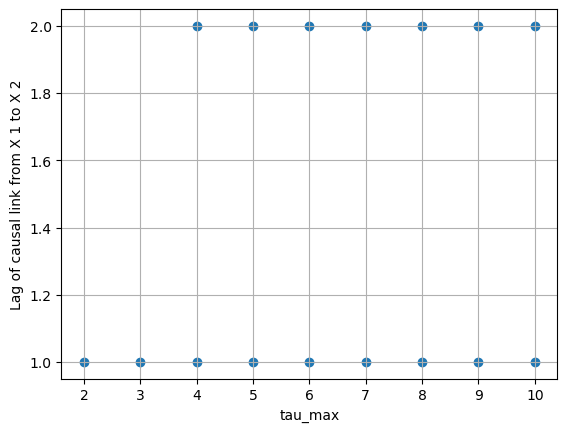

In [11]:
import matplotlib.pyplot as plt
from toolbox import post_processing_functions as ppf
import importlib
importlib.reload(ppf)

tau_min=1
# Lists to store tau_max values and corresponding lags
tau_max_values = []
lag_values = []

# Loop over tau_max from 2 to 10
for tau_max in range(2, 11):
    # Run PCMCI with the current tau_max
    results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)
    
    # Extract causal links
    N = results['p_matrix'].shape[0]
    results_text = ppf.print_significant_links(
        N, var_names, p_matrix=results['p_matrix'],
        val_matrix=results['val_matrix'], alpha_level=0.05
    )
    causal_links = ppf.parse_results_to_dict(results_text, var_names)
    
    # Check for causal links from 'X 1' to 'X 2'
    if 'X 2' in causal_links:
        for link in causal_links['X 2']:
            if link['cause'] == 'X 1':
                # Store the tau_max and corresponding lag
                tau_max_values.append(tau_max)
                lag_values.append(-link['lag'])  # Use negative lag for plotting
                
# Create the scatter plot
plt.scatter(tau_max_values, lag_values)
plt.xlabel('tau_max')
plt.ylabel('Lag of causal link from X 1 to X 2')
# plt.title('Causal Link Lags from X 1 to X 2 vs tau_max')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()
